In [1]:
import sys
import os
import numpy as np
from numpy import mean
np.seterr(divide='ignore', invalid='ignore')
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import julian
import datetime

from statistics import stdev
from statistics import mean

from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif',size=14)

In [2]:
ls

Beuermann_2011.dat*
Beuermann_2011.out*
Beuermann_2011_TDB.dat*
Beuermann_2011_TDB.out*
David_2012.dat
David_2012.out
Kittipong_2020.dat*
Kittipong_2020.out*
OC_Beuermann_2011.jpg*
OC_Beuermann_2011_rev1.jpg*
OC_Beuermann_2011_rev1.png*
OC_David_2012_rev1.jpg
OC_Kittipong_2020.jpg*
OC_Kittipong_2020_rev1.jpg*
OC_Kittipong_2020_rev1.png*
OC_Schwope_2002.jpg*
OC_Schwope_2002_rev1.jpg*
OC_Schwope_2002_rev1.png*
OC_Schwope_Beuermann_Kittipong_combined.jpg*
OC_Schwope_Beuermann_tdb.jpg*
Schwope_2002.dat*
Schwope_2002.out*
Schwope_2002_Details.dat*
Schwope_2002_O.dat*
Schwope_2002_TDB.dat*
Schwope_2002_TDB.out*
Schwope_2002_UV.dat*
Schwope_2002_UV.out*
Schwope_2002_X.dat*
Schwope_2002_X.out*
Schwope_Beuermann_Kittipong.dat*
Schwope_Beuermann_Kittipong.ipynb*
Schwope_Beuermann_Kittipong.jpg*
Schwope_Beuermann_Kittipong.out*
Schwope_Beuermann_Kittipong_David_rev1.ipynb*
Schwope_Beuermann_Kittipong_TDB.out*
Schwope_Beuermann_Kittipong_combined.out*
Schwope_Beuermann_Kittipong_obs.jpg*
Schwope_B

In [3]:
DP_Leo_Schwope_2002 = open("Schwope_2002_TDB.dat",'r').readlines()
N_dpleo_Schwope_2002 = len(DP_Leo_Schwope_2002)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Schwope_2002_TDB.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [4]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Schwope_2002))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Schwope_2002)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 44214.55325 1979-12-07 13:16:40.799989
1 44214.61562 1979-12-07 14:46:29.567984
2 44214.67798 1979-12-07 16:16:17.472013
3 44968.02309 1981-12-30 00:33:14.975982
4 44968.95712 1981-12-30 22:58:15.167993
5 44969.01962 1981-12-31 00:28:15.167993
6 44978.99755 1982-01-09 23:56:28.319997
7 44993.90078 1982-01-24 21:37:07.391982
8 44993.96328 1982-01-24 23:07:07.391982
9 44994.02642 1982-01-25 00:38:02.688000
10 45020.90513 1982-02-20 21:43:23.231987
11 45021.90292 1982-02-21 21:40:12.287981
12 45024.83386 1982-02-24 20:00:45.504011
13 45731.9664 1984-02-01 23:11:36.959982
14 45763.83373 1984-03-04 20:00:34.272006
15 45854.8828 1984-06-03 21:11:13.919981
16 46054.94231 1984-12-20 22:36:55.583986
17 46086.93565 1985-01-21 22:27:20.159989
18 46086.99796 1985-01-21 23:57:03.743985
19 48560.5578 1991-10-31 13:23:13.920005
20 48773.21509 1992-05-31 05:09:43.776006
21 48774.21293 1992-06-01 05:06:37.151993
22 49137.91294 1993-05-30 21:54:38.016015
23 49143.96214 1993-06-05 23:05:28.895996
24 49

In [5]:
#New ephemeris
#Linear phemeris equation(From equation 1) convert from TT to TDB
#T0_bjd = 2456670.34679230 - 2400000
#T0_bjd_err = 0.000000001
P0_day = 0.0623628426
P0_day_err = 0.0000000006

#T0_bjd = 2456717.36832561 - 2400000
#T0_bjd_err = 0.000000001

T0_bjd = 2448773.21461 - 2400000
T0_bjd_err = 0.00009

In [6]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT = [i for i in range(N_dpleo_Schwope_2002)]
Delta_aT_err = [i for i in range(N_dpleo_Schwope_2002)]
E_af = [i for i in range(N_dpleo_Schwope_2002)] #float number
E_ak = [i for i in range(N_dpleo_Schwope_2002)] #integer number
E_aj = [i for i in range(N_dpleo_Schwope_2002)] #integer number
P_aE = [i for i in range(N_dpleo_Schwope_2002)]
P_err_aE = [i for i in range(N_dpleo_Schwope_2002)]
T_aC_linear = [i for i in range(N_dpleo_Schwope_2002)]
T_aO_linear = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_a = [i for i in range(N_dpleo_Schwope_2002)]
P_aver_std_a = [i for i in range(N_dpleo_Schwope_2002)]

In [7]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Schwope_2002):
    BJD_time = np.array(T_obs)+ delta_tdb_tt + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Schwope_2002_TDB.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2444214.553250	-73099	44214.553250	44214.553179	6.153171	8.157496
1	2444214.615620	-73098	44214.615620	44214.615542	6.771570	8.157472
2	2444214.677980	-73097	44214.677980	44214.677904	6.525970	8.157448
3	2444968.023090	-61017	44968.023090	44968.021043	176.854239	92.278453
4	2444968.957120	-61002	44968.957120	44968.956486	54.802229	92.278426
5	2444969.019620	-61001	44969.019620	44969.018849	66.652628	92.278424
6	2444978.997550	-60841	44978.997550	44978.996903	55.868526	92.278140
7	2444993.900780	-60602	44993.900780	44993.901623	-72.814027	52.318025
8	2444993.963280	-60601	44993.963280	44993.963986	-60.963627	52.318022
9	2444994.026420	-60600	44994.026420	44994.026348	6.182772	52.318019
10	2445020.905130	-60169	45020.905130	45020.904734	34.248896	12.615554
11	2445021.902920	-60153	45021.902920	45021.902539	32.911286	12.615349
12	2445024.833860	-60106	45024.833860	45024.833593	23.096056	52.316488
13	2445731.966400	-4876

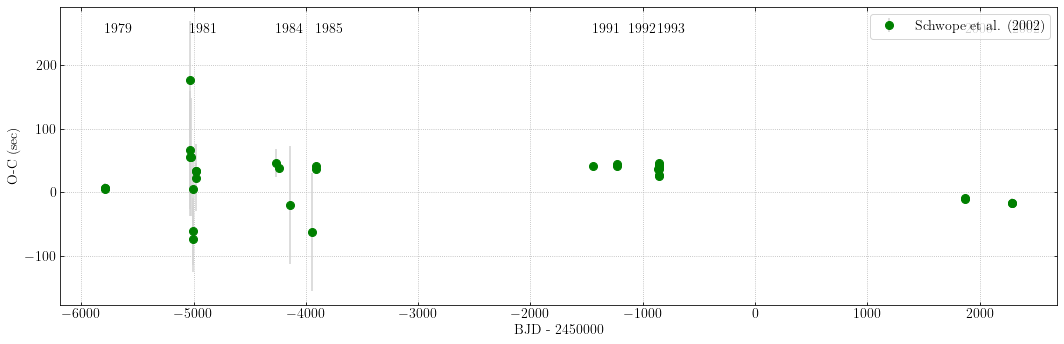

In [8]:
#Plot O-C vs BJD
Input_Schwope_2002  = 'Schwope_2002_TDB.out'
Data_Schwope_2002   = np.genfromtxt(Input_Schwope_2002)

N = 2450000
BJD_time_Schwope_2002 = Data_Schwope_2002[:,0] - N
Cycle_Schwope_2002 = Data_Schwope_2002[:,1]
T_O_linear_Schwope_2002 = Data_Schwope_2002[:,2]
T_C_linear_Schwope_2002 = Data_Schwope_2002[:,3]
OC_s_Schwope_2002 = Data_Schwope_2002[:,4]
OC_s_err_Schwope_2002 = Data_Schwope_2002[:,5]

 ##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Schwope_2002)
x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 250, '1979')
plt.text(BJD_time_Schwope_2002[3], 250, '1981')
plt.text(BJD_time_Schwope_2002[13], 250, '1984')
plt.text(BJD_time_Schwope_2002[17], 250, '1985')
plt.text(BJD_time_Schwope_2002[19], 250, '1991')
plt.text(BJD_time_Schwope_2002[20]+100, 250, '1992')
plt.text(BJD_time_Schwope_2002[22], 250, '1993')
plt.text(BJD_time_Schwope_2002[30], 250, '2000')
plt.text(BJD_time_Schwope_2002[32], 250, '2002')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_Schwope_2002_rev1.jpg", dpi=1000)
plt.show()

In [9]:
#Input file: Beuermann_2011
DP_Leo_Beuermann_2011 = open("Beuermann_2011_TDB.dat",'r').readlines()
N_dpleo_Beuermann_2011 = len(DP_Leo_Beuermann_2011)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Beuermann_2011_TDB.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [10]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Beuermann_2011))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Beuermann_2011)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 54914.83228 2009-03-24 19:58:28.992017
1 54914.894663 2009-03-24 21:28:18.883201
2 54916.827926 2009-03-26 19:52:12.806409
3 54919.696603 2009-03-29 16:43:06.499214
4 54920.756784 2009-03-30 18:09:46.137597
5 54922.627668 2009-04-01 15:03:50.515184
6 54922.690017 2009-04-01 16:33:37.468786
7 54922.752365 2009-04-01 18:03:24.336006
8 54922.814727 2009-04-01 19:33:12.412796
9 54937.781831 2009-04-16 18:45:50.198400
10 54937.844195 2009-04-16 20:15:38.447991
11 54938.717285 2009-04-17 17:12:53.423981
12 54938.779611 2009-04-17 18:42:38.390387
13 54940.650507 2009-04-19 15:36:43.804783
14 54940.712869 2009-04-19 17:06:31.881613
15 54940.775243 2009-04-19 18:36:20.995211
16 54940.837637 2009-04-19 20:06:11.836781
17 54941.773045 2009-04-20 18:33:11.088013
18 54941.835408 2009-04-20 20:02:59.251183
19 54942.646122 2009-04-21 15:30:24.940815
20 54942.770852 2009-04-21 18:30:01.612798
21 54942.833221 2009-04-21 19:59:50.294413
22 54942.895591 2009-04-21 21:29:39.062408
23 54943.706304 2009-0

In [11]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT = [i for i in range(N_dpleo_Beuermann_2011)]
Delta_aT_err = [i for i in range(N_dpleo_Beuermann_2011)]
E_af = [i for i in range(N_dpleo_Beuermann_2011)] #float number
E_ak = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
E_aj = [i for i in range(N_dpleo_Beuermann_2011)] #integer number
P_aE = [i for i in range(N_dpleo_Beuermann_2011)]
P_err_aE = [i for i in range(N_dpleo_Beuermann_2011)]
T_aC_linear = [i for i in range(N_dpleo_Beuermann_2011)]
T_aO_linear = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_a = [i for i in range(N_dpleo_Beuermann_2011)]
P_aver_std_a = [i for i in range(N_dpleo_Beuermann_2011)]

In [12]:
delta_tdb_tt = 0.0013/(24*60*60)
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Beuermann_2011):
    BJD_time = np.array(T_obs)+ delta_tdb_tt + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 2
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Beuermann_2011_TDB.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2454914.832280	98482	54914.832280	54914.832075	17.717759	8.454642
1	2454914.894663	98483	54914.894663	54914.894438	19.459359	8.317590
2	2454916.827926	98514	54916.827926	54916.827686	20.744939	8.115533
3	2454919.696603	98560	54919.696603	54919.696377	19.556109	8.117034
4	2454920.756784	98577	54920.756784	54920.756545	20.651298	8.184900
5	2454922.627668	98607	54922.627668	54922.627430	20.540879	8.185871
6	2454922.690017	98608	54922.690017	54922.689793	19.344878	8.596897
7	2454922.752365	98609	54922.752365	54922.752156	18.062478	8.596928
8	2454922.814727	98610	54922.814727	54922.814519	17.989677	8.527647
9	2454937.781831	98850	54937.781831	54937.781601	19.871124	8.193743
10	2454937.844195	98851	54937.844195	54937.843964	19.971123	8.466207
11	2454938.717285	98865	54938.717285	54938.717044	20.852714	8.261821
12	2454938.779611	98866	54938.779611	54938.779406	17.669514	8.604857
13	2454940.650507	98896	54940.650507	54940.65

/Users/kittipongwangnok/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


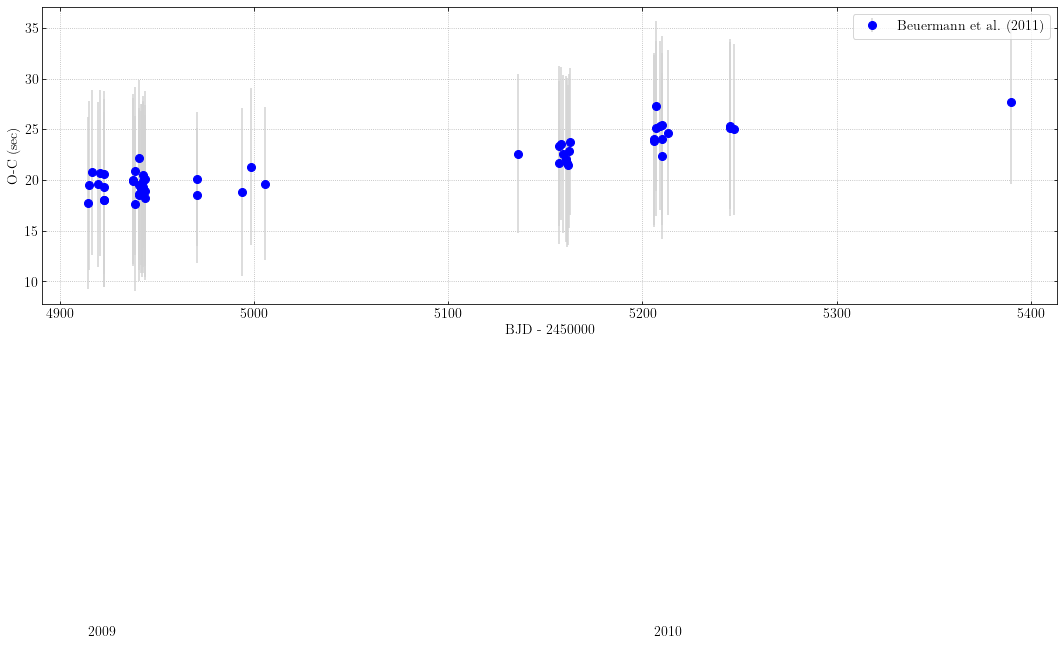

In [13]:
#Plot O-C vs BJD
Input_Beuermann_2011  = 'Beuermann_2011_TDB.out'
Data_Beuermann_2011   = np.genfromtxt(Input_Beuermann_2011)

N = 2450000
BJD_time_Beuermann_2011 = Data_Beuermann_2011[:,0] - N
Cycle_Beuermann_2011 = Data_Beuermann_2011[:,1]
T_O_linear_Beuermann_2011 = Data_Beuermann_2011[:,2]
T_C_linear_Beuermann_2011 = Data_Beuermann_2011[:,3]
OC_s_Beuermann_2011= Data_Beuermann_2011[:,4]
OC_s_err_Beuermann_2011 = Data_Beuermann_2011[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Beuermann_2011)
x2 = max(BJD_time_Beuermann_2011)
plt.errorbar(BJD_time_Beuermann_2011, OC_s_Beuermann_2011, yerr= OC_s_err_Beuermann_2011, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')

#Beuermann_2011
plt.text(BJD_time_Beuermann_2011[0], -25, '2009')
plt.text(BJD_time_Beuermann_2011[42], -25, '2010')


#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_Beuermann_2011_rev1.jpg", dpi=1000)
plt.show()

In [14]:
#Input file: Beuermann_2011
DP_Leo_Kittipong_2020 = open("Kittipong_2020.dat",'r').readlines()
N_dpleo_Kittipong_2020 = len(DP_Leo_Kittipong_2020)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("Kittipong_2020.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [15]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_Kittipong_2020))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_Kittipong_2020)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56670.34677356 2014-01-13 08:19:21.235597
1 56717.36837118 2014-03-01 08:50:27.269934
2 56748.30036723 2014-04-01 07:12:31.728679
3 57100.33871547 2015-03-19 08:07:45.016601
4 57101.14945633 2015-03-20 03:35:13.026921
5 57748.28884725 2016-12-26 06:55:56.402394
6 57748.35118657 2016-12-26 08:25:42.519629
7 57802.2327151 2017-02-18 05:35:06.584644
8 57802.41978731 2017-02-18 10:04:29.623589
9 57829.36057704 2017-03-17 08:39:13.856246
10 58140.42650848 2018-01-22 10:14:10.332690
11 58200.23245594 2018-03-23 05:34:44.193214
12 58542.41740511 2019-02-28 10:01:03.801491
13 58873.31470181 2020-01-25 07:33:10.236385
14 58851.30060629 2020-01-03 07:12:52.383445
15 58870.25888748 2020-01-22 06:12:47.878273
16 58870.38363565 2020-01-22 09:12:26.120153
17 58871.19431139 2020-01-23 04:39:48.504110
18 58871.25672608 2020-01-23 06:09:41.133319
19 58873.31470181 2020-01-25 07:33:10.236385
20 58873.4394328 2020-01-25 10:32:46.993904
21 58880.17462731 2020-02-01 04:11:27.799595
22 58909.29802908 2020

In [16]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT = [i for i in range(N_dpleo_Kittipong_2020)]
Delta_aT_err = [i for i in range(N_dpleo_Kittipong_2020)]
E_af = [i for i in range(N_dpleo_Kittipong_2020)] #float number
E_ak = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
E_aj = [i for i in range(N_dpleo_Kittipong_2020)] #integer number
P_aE = [i for i in range(N_dpleo_Kittipong_2020)]
P_err_aE = [i for i in range(N_dpleo_Kittipong_2020)]
T_aC_linear = [i for i in range(N_dpleo_Kittipong_2020)]
T_aO_linear = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_a = [i for i in range(N_dpleo_Kittipong_2020)]
P_aver_std_a = [i for i in range(N_dpleo_Kittipong_2020)]

In [17]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_Kittipong_2020):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("Kittipong_2020.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2456670.346774	126632	56670.346774	56670.346094	58.703327	8.222143
1	2456717.368371	127386	56717.368371	56717.367677	59.938813	7.087870
2	2456748.300367	127882	56748.300367	56748.299647	62.195615	9.288486
3	2457100.338715	133527	57100.338715	57100.337894	70.987938	8.816546
4	2457101.149456	133540	57101.149456	57101.148611	73.053434	8.377243
5	2457748.288847	143917	57748.288847	57748.287828	88.023081	9.713895
6	2457748.351187	143918	57748.351187	57748.350191	85.990728	9.702878
7	2457802.232715	144782	57802.232715	57802.231687	88.800767	9.151313
8	2457802.419787	144785	57802.419787	57802.418776	87.390909	9.082777
9	2457829.360577	145217	57829.360577	57829.359524	90.996105	8.897808
10	2458140.426508	150205	58140.426508	58140.425383	97.264529	9.441506
11	2458200.232456	151164	58200.232456	58200.231349	95.658059	9.429360
12	2458542.417405	156651	58542.417405	58542.416266	98.407635	8.955610
13	2458873.314702	157255	58873.3

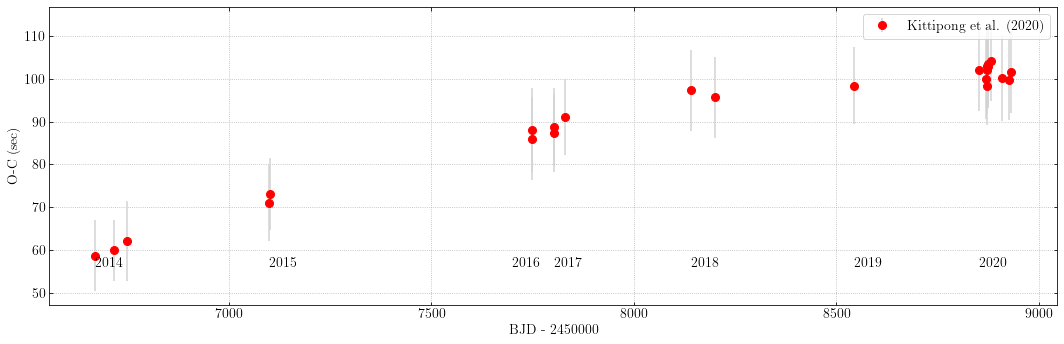

In [18]:
#Plot O-C vs BJD
Input_Kittipong_2020  = 'Kittipong_2020.out'
Data_Kittipong_2020   = np.genfromtxt(Input_Kittipong_2020)

N = 2450000
BJD_time_Kittipong_2020 = Data_Kittipong_2020[:,0] - N
Cycle_Kittipong_2020 = Data_Kittipong_2020[:,1]
T_O_linear_Kittipong_2020 = Data_Kittipong_2020[:,2]
T_C_linear_Kittipong_2020 = Data_Kittipong_2020[:,3]
OC_s_Kittipong_2020 = Data_Kittipong_2020[:,4]
OC_s_err_Kittipong_2020 = Data_Kittipong_2020[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_Kittipong_2020)
x2 = max(BJD_time_Kittipong_2020)
plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='red',
                    ecolor='lightgray', label = 'Kittipong et al. (2020)')

#Kittipong_2020
plt.text(BJD_time_Kittipong_2020[0], 56, '2014')
plt.text(BJD_time_Kittipong_2020[3], 56, '2015')
plt.text(BJD_time_Kittipong_2020[5]-50, 56, '2016')
plt.text(BJD_time_Kittipong_2020[7], 56, '2017')
plt.text(BJD_time_Kittipong_2020[10], 56, '2018')
plt.text(BJD_time_Kittipong_2020[12], 56, '2019')
plt.text(BJD_time_Kittipong_2020[14], 56, '2020')



#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_Kittipong_2020_rev1.jpg", dpi=1000)
plt.show()

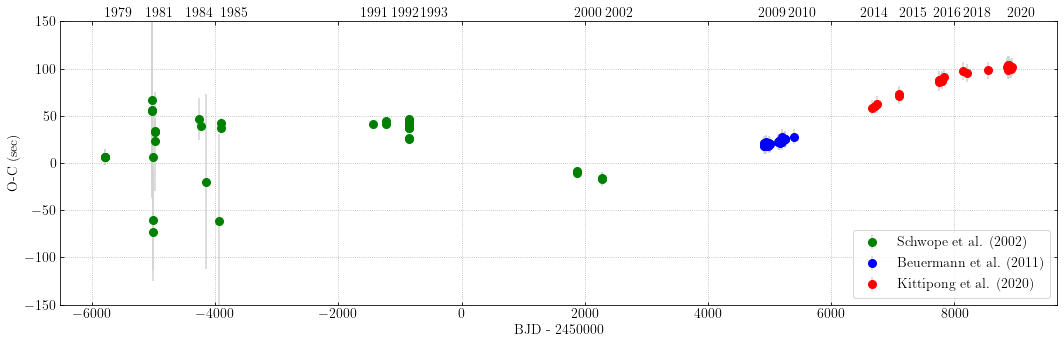

In [19]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 155, '1979')
plt.text(BJD_time_Schwope_2002[3]-100, 155, '1981')
plt.text(BJD_time_Schwope_2002[13]-200, 155, '1984')
plt.text(BJD_time_Schwope_2002[17], 155, '1985')
plt.text(BJD_time_Schwope_2002[19]-200, 155, '1991')
plt.text(BJD_time_Schwope_2002[20]+100, 155, '1992')
plt.text(BJD_time_Schwope_2002[22]+200, 155, '1993')
plt.text(BJD_time_Schwope_2002[30]-50, 155, '2000')
plt.text(BJD_time_Schwope_2002[32]+50, 155, '2002')


plt.errorbar(BJD_time_Beuermann_2011, OC_s_Beuermann_2011, yerr= OC_s_err_Beuermann_2011, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')

#Beuermann_2011
#plt.text(BJD_time_Beuermann_2011[0], 300, '2002')
plt.text(BJD_time_Beuermann_2011[1]-100, 155, '2009')
plt.text(BJD_time_Beuermann_2011[42]+100, 155, '2010')


plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='red',
                    ecolor='lightgray', label = 'Kittipong et al. (2020)')

#Kittipong_2020
#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[1]+50, 155, '2015')
#plt.text(BJD_time_Kittipong_2020[2]+100, 155, '2020')
#plt.text(BJD_time_Kittipong_2020[11]-300, 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12]-100, 155, '2019')

plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
plt.text(BJD_time_Kittipong_2020[3], 155, '2015')
plt.text(BJD_time_Kittipong_2020[5]-100, 155, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 155, '2017')
plt.text(BJD_time_Kittipong_2020[10], 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 155, '2019')
plt.text(BJD_time_Kittipong_2020[14], 155, '2020')



#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("Schwope_Beuermann_Kittipong_rev1.jpg", dpi=1000)
plt.show()

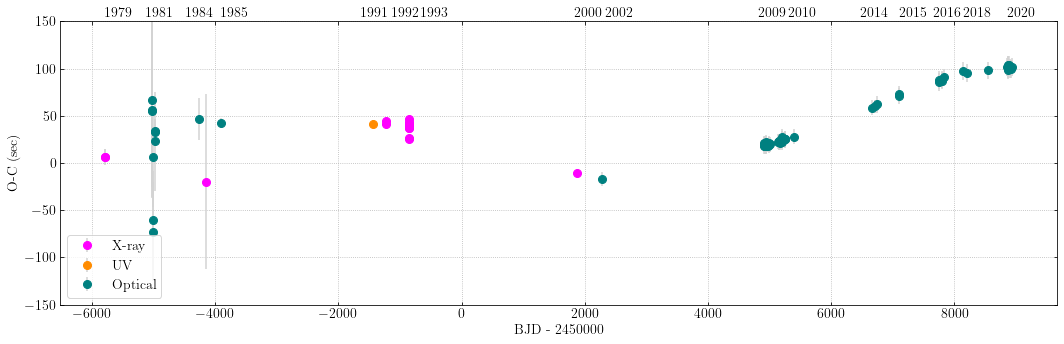

In [20]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')

plt.errorbar(BJD_time_Schwope_2002[0:2], OC_s_Schwope_2002[0:2], yerr= OC_s_err_Schwope_2002[0:2], fmt='o', markersize=8, color='magenta',
                    ecolor='lightgray', label = 'X-ray')
plt.errorbar(BJD_time_Schwope_2002[15:16], OC_s_Schwope_2002[15:16], yerr= OC_s_err_Schwope_2002[15:16], fmt='o', markersize=8, color='magenta',
                    ecolor='lightgray')
plt.errorbar(BJD_time_Schwope_2002[20:31], OC_s_Schwope_2002[20:31], yerr= OC_s_err_Schwope_2002[20:31], fmt='o', markersize=8, color='magenta',
                    ecolor='lightgray')

plt.errorbar(BJD_time_Schwope_2002[19], OC_s_Schwope_2002[19], yerr= OC_s_err_Schwope_2002[19], fmt='o', markersize=8, color='darkorange',
                    ecolor='lightgray', label = 'UV')

plt.errorbar(BJD_time_Schwope_2002[3:14], OC_s_Schwope_2002[3:14], yerr= OC_s_err_Schwope_2002[3:14], fmt='o', markersize=8, color='teal',
                    ecolor='lightgray', label = 'Optical')
plt.errorbar(BJD_time_Schwope_2002[17:18], OC_s_Schwope_2002[17:18], yerr= OC_s_err_Schwope_2002[17:18], fmt='o', markersize=8, color='teal',
                    ecolor='lightgray')
plt.errorbar(BJD_time_Schwope_2002[32], OC_s_Schwope_2002[32], yerr= OC_s_err_Schwope_2002[32], fmt='o', markersize=8, color='teal',
                    ecolor='lightgray')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 155, '1979')
plt.text(BJD_time_Schwope_2002[3]-100, 155, '1981')
plt.text(BJD_time_Schwope_2002[13]-200, 155, '1984')
plt.text(BJD_time_Schwope_2002[17], 155, '1985')
plt.text(BJD_time_Schwope_2002[19]-200, 155, '1991')
plt.text(BJD_time_Schwope_2002[20]+100, 155, '1992')
plt.text(BJD_time_Schwope_2002[22]+200, 155, '1993')
plt.text(BJD_time_Schwope_2002[30]-50, 155, '2000')
plt.text(BJD_time_Schwope_2002[32]+50, 155, '2002')

plt.errorbar(BJD_time_Beuermann_2011, OC_s_Beuermann_2011, yerr= OC_s_err_Beuermann_2011, fmt='o', markersize=8, color='teal',
                    ecolor='lightgray')

#Beuermann_2011
plt.text(BJD_time_Beuermann_2011[1]-100, 155, '2009')
plt.text(BJD_time_Beuermann_2011[42]+100, 155, '2010')


plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='teal',
                    ecolor='lightgray')

#Kittipong_2020
#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[1]+50, 155, '2015')
#plt.text(BJD_time_Kittipong_2020[2]+100, 155, '2020')
#plt.text(BJD_time_Kittipong_2020[11]-300, 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12]-100, 155, '2019')

plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
plt.text(BJD_time_Kittipong_2020[3], 155, '2015')
plt.text(BJD_time_Kittipong_2020[5]-100, 155, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 155, '2017')
plt.text(BJD_time_Kittipong_2020[10], 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 155, '2019')
plt.text(BJD_time_Kittipong_2020[14], 155, '2020')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("Schwope_Beuermann_Kittipong_obs_rev1.jpg", dpi=1000)
plt.show()

### Input data's David

In [21]:
#Input file: Beuermann_2011
DP_Leo_David_2012 = open("David_2012.dat",'r').readlines()
N_dpleo_David_2012 = len(DP_Leo_David_2012)

#Read datat
Cycle = []
T_obs = []
T_obs_err = []
#Please change the input file
for line in open("David_2012.dat"):
    li=line.strip()
    if not li.startswith("#"):
        Cycle.append(float(li.split(" ")[0]))
        T_obs.append(float(li.split(" ")[1]))
        T_obs_err.append(float(li.split(" ")[2]))

In [22]:
#Arrays
LT_a = [i for i in range(len(DP_Leo_David_2012))]

Local_Time = []
Flux = []
for i in range(len(DP_Leo_David_2012)):
    LT = julian.from_jd(T_obs[i], fmt='mjd')
    LT_a[i] = LT
    Local_Time.append(LT_a[i])
    print(i, T_obs[i], LT_a[i])

0 56004.24921 2012-03-18 05:58:51.744003
1 56403.30917 2013-04-21 07:25:12.287981
2 56772.18547 2014-04-25 04:27:04.607992
3 57453.81143 2016-03-06 19:28:27.551980
4 57846.8222 2017-04-03 19:43:58.079984
5 58187.51041 2018-03-10 12:14:59.424009
6 58593.24301 2019-04-20 05:49:56.063987
7 58934.11856 2020-03-26 02:50:43.583987
8 59317.08867 2021-04-13 02:07:41.087997


In [23]:
#Arrays
BJD_time_a = [i for i in range(N_dpleo_David_2012)]
Delta_aT = [i for i in range(N_dpleo_David_2012)]
Delta_aT_err = [i for i in range(N_dpleo_David_2012)]
E_af = [i for i in range(N_dpleo_David_2012)] #float number
E_ak = [i for i in range(N_dpleo_David_2012)] #integer number
E_aj = [i for i in range(N_dpleo_David_2012)] #integer number
P_aE = [i for i in range(N_dpleo_David_2012)]
P_err_aE = [i for i in range(N_dpleo_David_2012)]
T_aC_linear = [i for i in range(N_dpleo_David_2012)]
T_aO_linear = [i for i in range(N_dpleo_David_2012)]
P_aver_a = [i for i in range(N_dpleo_David_2012)]
P_aver_std_a = [i for i in range(N_dpleo_David_2012)]

In [24]:
OC_cal = []
#print ('-----------------------------------------------------------------------------')
#print ('Cycle \t\t T_O \t   T_C \t\t BJD - 2450000 \t OC_lin OC_err_Lin OC_occ')
print('No. \t BJD_time \t Cycle \t T_O_linear \t T_C_linear \t OC_s \t\t OC_s_err')
#print ('-----------------------------------------------------------------------------')
for i in range (0,N_dpleo_David_2012):
    BJD_time = np.array(T_obs) + 2400000
    BJD_time_a[i] = BJD_time
    Delta_T = np.array(T_obs) - np.array(T0_bjd)
    Delta_aT[i] = Delta_T #arrays
    Delta_T_err = np.sqrt((np.array(T_obs_err)/np.array(T_obs))**2 + (np.array(T0_bjd_err)/np.array(T0_bjd))**2)
    E_k = Cycle
    E_ak[i] = E_k #arrays
    #    print (Delta_T_err[i])
    E_f = Delta_T / P0_day                      #Calculate cycle with float number
    ##    print (E_f)                                 #print cycle with float number
    E_af[i] = E_f #arrays
    E_j = np.round(Delta_T / P0_day)           #Calculate cycle with integer number
##print (Delta_T)
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_j[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
    else:
        E_k[i] = 1
        P_E_day = Delta_T[i] / E_k[i]
#        print (P_E_day)
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_O_linear = T0_bjd + P_aE[i]*E_k[i]               #Linear
        T_aO_linear[i] = T_O_linear #arrays
#    print ('%0.6f' %(T_O))
#print (E_j)                                #print cycle with integer number
    if  E_j[i] != 0:
        P_E_day = Delta_T[i] / E_j[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_j[i])
#        print (P_E_err_day)
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2 + (np.array(P0_day_err)**2))) * np.array(E_j[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    else:
        P_E_day = Delta_T[i] / E_k[i]
        P_aE[i] = P_E_day
        P_E_err_day = np.abs((np.array(T_obs_err[i]) - np.array(T0_bjd_err)) / E_k[i])
        P_err_aE[i] = P_E_err_day
        T_C_linear = T0_bjd + P0_day*E_j[i]              #Linear
        T_aC_linear[i] = T_C_linear #arrays
#    print (T_O, T_C)
        OC = np.array(T_O_linear) - np.array(T_C_linear)
        OC_s = (np.array(T_O_linear) - np.array(T_C_linear))*24*60*60
        OC_err = np.abs(np.sqrt((np.array(P_err_aE[i])**2)) *np.array(E_k[i]))
#        print (OC_err)
        OC_s_err = OC_err*24*60*60
    print ('%0.0f\t%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(i, BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))
    OC_cal.append('%0.6f\t%0.0f\t%0.6f\t%0.6f\t%0.6f\t%0.6f' %(BJD_time[i], Cycle[i], T_O_linear, T_C_linear, OC_s, OC_s_err))

#P_aver = mean(P_aE[i])
#P_aver_a[i] = P_aver
#P_aver_std = np.std(P_aE[i])
#P_aver_std = mean(P_err_aE[i])
#P_aver_std_a[i] = P_aver_std
#print('%0.11f %0.11f' %(P_aver, P_aver_std))

rerults = OC_cal
f = open("David_2012.out", 'w')
for i in range(len(rerults)):
    f.write(str(rerults[i])+ '\n')
f.close()

No. 	 BJD_time 	 Cycle 	 T_O_linear 	 T_C_linear 	 OC_s 		 OC_s_err
0	2456004.249210	115951	56004.249210	56004.248572	55.096179	6.072678
1	2456403.309170	122350	56403.309170	56403.308402	66.345684	7.674065
2	2456772.185470	128265	56772.185470	56772.184616	73.777898	6.870124
3	2457453.811430	139195	57453.811430	57453.810486	81.586903	8.884966
4	2457846.822200	145497	57846.822200	57846.821120	93.331670	7.975509
5	2458187.510410	150960	58187.510410	58187.509329	93.407373	8.554914
6	2458593.243010	157466	58593.243010	58593.241983	88.745609	10.696304
7	2458934.118560	162932	58934.118560	58934.117281	110.548511	9.126090
8	2459317.088670	169073	59317.088670	59317.087497	101.354981	10.183055


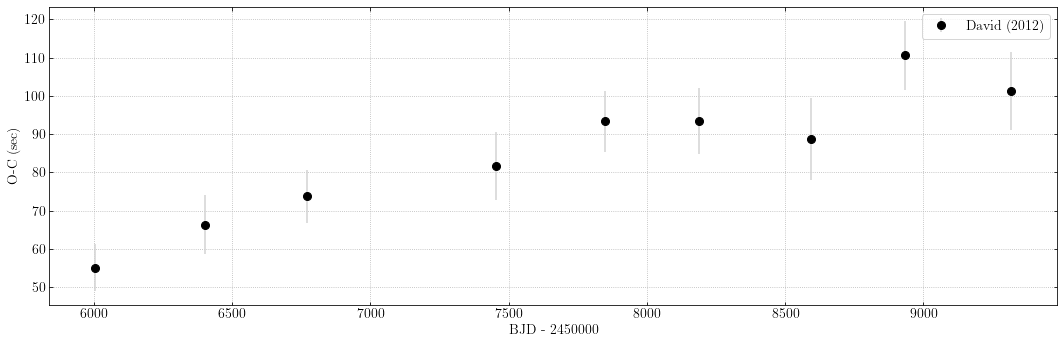

In [25]:
#Plot O-C vs BJD
Input_David_2012  = 'David_2012.out'
Data_David_2012   = np.genfromtxt(Input_David_2012)

N = 2450000
BJD_time_David_2012 = Data_David_2012[:,0] - N
Cycle_David_2012 = Data_David_2012[:,1]
T_O_linear_David_2012 = Data_David_2012[:,2]
T_C_linear_David_2012 = Data_David_2012[:,3]
OC_s_David_2012 = Data_David_2012[:,4]
OC_s_err_David_2012 = Data_David_2012[:,5]

##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

x1 = min(BJD_time_David_2012)
x2 = max(BJD_time_David_2012)
plt.errorbar(BJD_time_David_2012, OC_s_David_2012, yerr= OC_s_err_David_2012, fmt='o', markersize=8, color='black',
                    ecolor='lightgray', label = 'David (2012)')

#Kittipong_2020
#plt.text(BJD_time_Kittipong_2020[0], 56, '2014')
#plt.text(BJD_time_Kittipong_2020[3], 56, '2015')
#plt.text(BJD_time_Kittipong_2020[5]-50, 56, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 56, '2017')
#plt.text(BJD_time_Kittipong_2020[10], 56, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 56, '2019')
#plt.text(BJD_time_Kittipong_2020[14], 56, '2020')



#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
#plt.ylim(-20,20)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("OC_David_2012_rev1.jpg", dpi=1000)
plt.show()

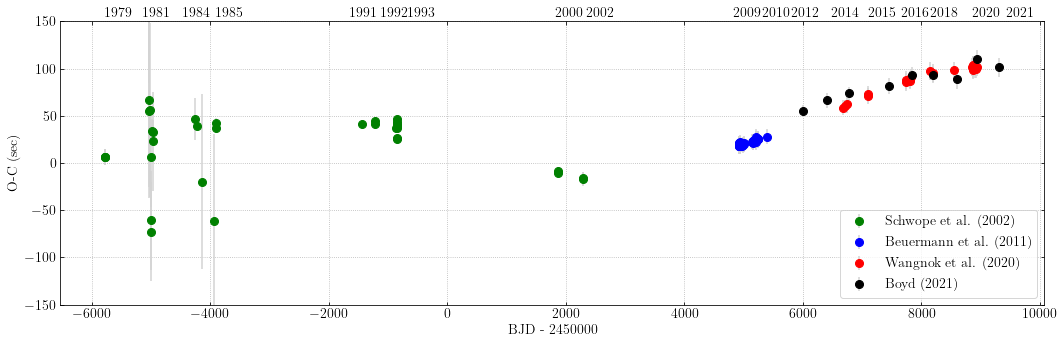

In [26]:
##Plotgraph
fig=plt.figure(figsize=(15, 5), tight_layout=True)
plt.tick_params(direction='in', which='both', bottom='on',top='on', right = 'on')

#x1 = min(BJD_time_Schwope_2002)
#x2 = max(BJD_time_Schwope_2002)
#plt.errorbar(BJD_time, OC_s, yerr=OC_s_err, fmt='o', color='limegreen')
plt.errorbar(BJD_time_Schwope_2002, OC_s_Schwope_2002, yerr= OC_s_err_Schwope_2002, fmt='o', markersize=8, color='green',
                    ecolor='lightgray', label = 'Schwope et al. (2002)')

#Schwope_2002
plt.text(BJD_time_Schwope_2002[0], 155, '1979')
plt.text(BJD_time_Schwope_2002[3]-100, 155, '1981')
plt.text(BJD_time_Schwope_2002[13]-200, 155, '1984')
plt.text(BJD_time_Schwope_2002[17], 155, '1985')
plt.text(BJD_time_Schwope_2002[19]-200, 155, '1991')
plt.text(BJD_time_Schwope_2002[20]+100, 155, '1992')
plt.text(BJD_time_Schwope_2002[22]+200, 155, '1993')
plt.text(BJD_time_Schwope_2002[30]-50, 155, '2000')
plt.text(BJD_time_Schwope_2002[32]+50, 155, '2002')


plt.errorbar(BJD_time_Beuermann_2011, OC_s_Beuermann_2011, yerr= OC_s_err_Beuermann_2011, fmt='o', markersize=8, color='blue',
                    ecolor='lightgray', label = 'Beuermann et al. (2011)')

#Beuermann_2011
#plt.text(BJD_time_Beuermann_2011[0], 300, '2002')
plt.text(BJD_time_Beuermann_2011[1]-100, 155, '2009')
plt.text(BJD_time_Beuermann_2011[42]+100, 155, '2010')


plt.errorbar(BJD_time_Kittipong_2020, OC_s_Kittipong_2020, yerr= OC_s_err_Kittipong_2020, fmt='o', markersize=8, color='red',
                    ecolor='lightgray', label = 'Wangnok et al. (2020)')

#Kittipong_2020
#plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
#plt.text(BJD_time_Kittipong_2020[1]+50, 155, '2015')
#plt.text(BJD_time_Kittipong_2020[2]+100, 155, '2020')
#plt.text(BJD_time_Kittipong_2020[11]-300, 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12]-100, 155, '2019')

plt.text(BJD_time_Kittipong_2020[0]-200, 155, '2014')
plt.text(BJD_time_Kittipong_2020[3], 155, '2015')
plt.text(BJD_time_Kittipong_2020[5]-100, 155, '2016')
#plt.text(BJD_time_Kittipong_2020[7], 155, '2017')
plt.text(BJD_time_Kittipong_2020[10], 155, '2018')
#plt.text(BJD_time_Kittipong_2020[12], 155, '2019')
plt.text(BJD_time_Kittipong_2020[14], 155, '2020')

plt.errorbar(BJD_time_David_2012, OC_s_David_2012, yerr= OC_s_err_David_2012, fmt='o', markersize=8, color='black',
                    ecolor='lightgray', label = 'Boyd (2021)')

plt.text(BJD_time_David_2012[0]-200, 155, '2012')
plt.text(BJD_time_David_2012[7]+500, 155, '2021')

#plt.hlines(y= 0, xmin= x1, xmax= x2, colors='k', linestyles='dotted')
#plt.xlim(x1,x2)
plt.ylim(-150,150)
plt.xlabel('BJD - 2450000')
plt.ylabel('O-C (sec)')
plt.legend()
plt.grid(linestyle='dotted')
######plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig(output_filename, dpi=1000)
plt.savefig("Schwope_Beuermann_Kittipong_rev1.jpg", dpi=1000)
plt.show()